In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_data, on="Mouse ID", how="left")
merged_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# calculate the number of mice
print(merged_df["Mouse ID"].nunique())

249


In [3]:
#determine duplicate mouse by ID in both Timepoint and Mouse ID columns
    
dup_mouse_df = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mouse_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
#retrive all data for duplicate mouse
merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"], keep = "last")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
#created a new database without duplicates

clean_df = merged_df[merged_df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
#check the number of mice to confirm duplicates were removed
clean_df["Mouse ID"].nunique()


248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#group data by the Drug Regimen
grouped_df=clean_df.groupby(["Drug Regimen"])

#Used the aggregate function to determine the mean, median, variance, standard deviation, and SEM for the Tumor Volume column
stat_sum=grouped_df["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

#converted data into a dataframe and displayed it. 
stat_sum_df = pd.DataFrame(stat_sum)
stat_sum_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


<Axes: xlabel='Drug Regimen', ylabel='# of Observable Mouse Timepoints'>

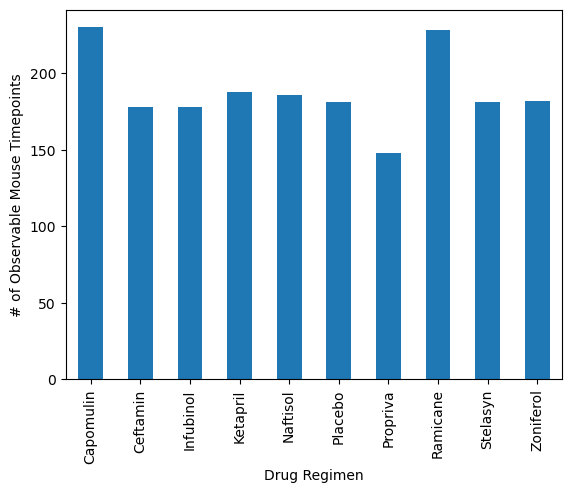

In [8]:
#plot data in bar chart using pandas
panda_bar = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
panda_bar.plot(kind="bar", rot=90, xlabel="Drug Regimen", ylabel="# of Observable Mouse Timepoints")



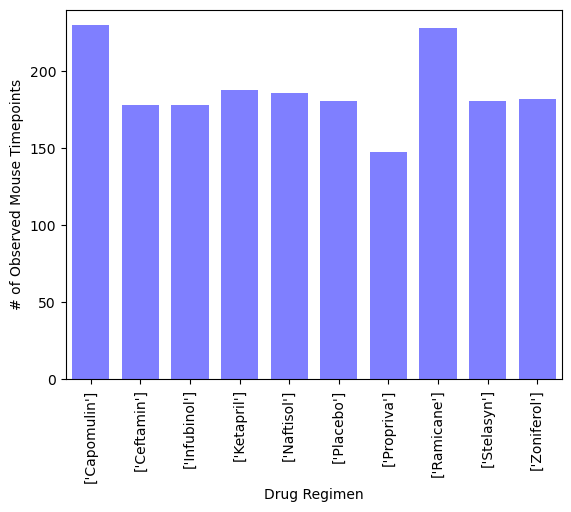

In [9]:

#plot data in a bar chart using pyplot
bar_x = np.arange(len(grouped_df["Drug Regimen"].unique()))
bar_y = grouped_df["Mouse ID"].count()

#set plot limits
plt.xlim(-0.5, bar_x[-1]+0.5)
plt.ylim(0, max(bar_y)+10)

#set x tick locations:
tick_locs=[name for name in bar_x]
plt.xticks(tick_locs, grouped_df["Drug Regimen"].unique(), rotation="vertical")

#label the chart:
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(bar_x, bar_y, width=0.75, color="blue", alpha=0.5, align="center")
plt.show()

<Axes: ylabel='Sex'>

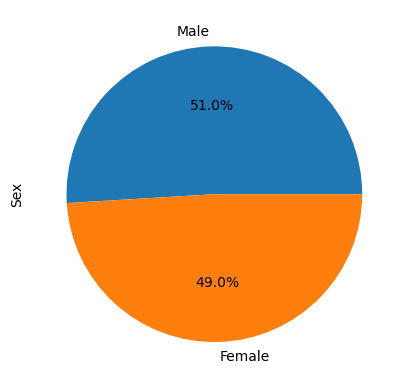

In [10]:
#create a pie chart to show the distribution of male and female mice using pandas
panda_pie = clean_df["Sex"].value_counts()
panda_pie.plot(kind="pie", autopct="%1.1f%%")


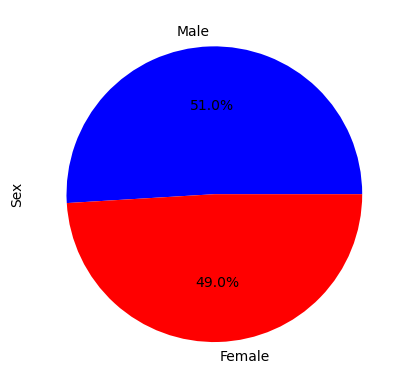

In [11]:
#create a pie chart to show the distribution of male and female mice using pyplot
gender_count = clean_df["Sex"].value_counts()
pie_label = ["Male", "Female"]
colors = ["blue", "Red"]
plt.pie(gender_count,  labels=pie_label, colors=colors,
        autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin, using the last timepoint for each


final_four = clean_df[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") 
                      | (clean_df["Drug Regimen"] == "Infubinol") |(clean_df["Drug Regimen"] == "Ceftamin")]
final_four_df = pd.DataFrame(final_four)
final_df = final_four_df.groupby(["Drug Regimen", "Mouse ID"]).aggregate({"Timepoint": "last"})

final_df

Timepoint
Drug Regimen Mouse ID           
Capomulin    b128             45
             b742             45
             f966             20
             g288             45
             g316             45
...                          ...
Ramicane     s508             45
             u196             45
             w678              5
             y449             15
             z578             45

[100 rows x 1 columns]

In [17]:
#put treatments into list for a for loop
treatment = []
treatment.append(final_df["Drug Regimen"].unique())

#create empty list for tumor volume data
tumor_vol_data = []



KeyError: 'Drug Regimen'